In [1]:
import logging
import pdb
# logging.basicConfig(level=logging.INFO)
%matplotlib inline
%run LocalRepo.ipynb
%run repos.ipynb
%run parsing.ipynb
%run metrics.ipynb
%run analysis.ipynb
import pyfiglet

In [2]:
repos = [
    # "ErikBrendel/LudumDare",
    "jfree/jfreechart"
]
# = [
    # "square/okhttp",
    # "jenkinsci/jenkins",
    # "eclipse/che",
    # "elastic/elasticsearch",
    # "apache/camel"
#]

   _  __                  ___  __                    _                _   
  (_)/ _|_ __ ___  ___   / (_)/ _|_ __ ___  ___  ___| |__   __ _ _ __| |_ 
  | | |_| '__/ _ \/ _ \ / /| | |_| '__/ _ \/ _ \/ __| '_ \ / _` | '__| __|
  | |  _| | |  __/  __// / | |  _| | |  __/  __/ (__| | | | (_| | |  | |_ 
 _/ |_| |_|  \___|\___/_/ _/ |_| |_|  \___|\___|\___|_| |_|\__,_|_|   \__|
|__/                     |__/                                             

updating jfree/jfreechart...
Repo is up to date!
Using precalculated structural values

Results from the structural view:

WeightGraph statistics: 2608 nodes, 4995 edges, 22 connected component(s), with sizes: [2452, 7, 11, 5, 7, 6, 15, 5, 5, 6, 8, 6, 5, 5, 6, 11, 5, 12, 12, 5, 7, 7]
Edge weights: [1, 1, 1, 1, 1] ... [2, 2, 2, 3, 3] , mean: 1.0216216216216216


Using precalculated evolutionary values

Results from the evolutionary view:

WeightGraph statistics: 7846 nodes, 99947 edges, 95 connected component(s), with sizes: [6376, 6, 6, 15, 10


Amount of disagreements: 240720 which is 0.23% of all edges


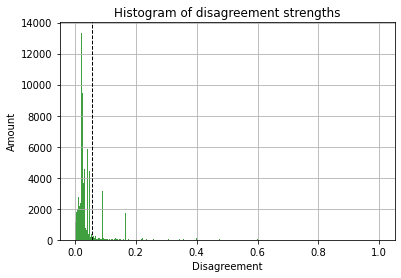

Strong nontrivial disagreements: 398
src/main/java/org/jfree/chart/ChartFactory.java/ChartFactory/createXYAreaChart <> src/main/java/org/jfree/chart/JFreeChart.java/JFreeChart  -  0.9687643546164446
src/main/java/org/jfree/chart/MouseWheelHandler.java/MouseWheelHandler/chartPanel <> src/main/java/org/jfree/chart/ChartPanel.java/ChartPanel  -  0.9500000000000001
source/org/jfree/chart/axis/DateTickUnitType.java <> source/org/jfree/chart/axis/DateTickUnit.java/DateTickUnit  -  0.9411764705882353
tests/org/jfree/data/general/DefaultPieDatasetTest.java/DefaultPieDatasetTest/datasetChanged <> tests/org/jfree/data/general/TestIntervalCategoryDataset.java/TestIntervalCategoryDataset  -  0.9333333333333333
tests/org/jfree/data/general/DefaultHeatMapDatasetTest.java/DefaultHeatMapDatasetTest/datasetChanged <> tests/org/jfree/data/general/TestIntervalCategoryDataset.java/TestIntervalCategoryDataset  -  0.9333333333333333
tests/org/jfree/chart/plot/junit/FastScatterPlotTests.java/FastScatterPlotT

In [3]:
views = ["structural", "evolutionary"] # ["structural", "evolutionary", "linguistic"]

for repo in repos:
    r = LocalRepo(repo)
    print(pyfiglet.figlet_format(r.name))
    r.update()
    
    # pdb.set_trace()
    # tree = RepoTree.init_from_repo(r)
    # print(r.get_tree())
    
    for view in views:
        # MetricManager.clear(r, view)

        coupling_graph = MetricManager.get(r, view)
        coupling_graph.plaintext_save(repo)
        # coupling_graph.html_save(repo)
        
        
        #print("Most linked nodes:")
        #debug_list = sorted(list(coupling_graph.g.edges.data()), key = lambda e: -e[2]["weight"])
        #print([str(info["weight"]) + ": " + a + " <> " + b for a, b, info in debug_list[0:10]])

        print("\nResults from the " + view + " view:\n")

        coupling_graph.print_statistics()
        # coupling_graph.show_weight_histogram()
        # coupling_graph.visualize(use_spring = False, with_labels = True)
        print("\n")
        
    analyze_disagreements([MetricManager.get(r, view) for view in views])
    
print("\nProgram is over!")